In [1]:
import certifi
import os
os.environ['SSL-CERT_FILE'] = certifi.where()
from giza_datasets import DatasetsLoader


loader = DatasetsLoader()
df = loader.load("gora-competition-training")
df = df.to_pandas()

Dataset read from cache.
Loading dataset gora-competition-training from cache.


In [17]:
import pandas as pd
# df.to_csv("gora-competition-real-training.csv", index=False)
import pandas as pd
df = pd.read_csv("gora-competition-real-training.csv")

df = df[df.columns[~pd.Series(df.columns).isin(['calc_start_time', 'added_at' ,'__index_level_0__', 'date'])]]
df.sort_values(by = ['address', 'days_since_first_borrow'], inplace = True, ascending = False)
df.drop_duplicates(subset = df.drop('days_since_first_borrow', axis=1).columns, inplace = True)


In [161]:
df.liquidated.value_counts(normalize=True)

liquidated
0.0    0.807434
1.0    0.192566
Name: proportion, dtype: float64

In [154]:
df.total_liquidation_to_total_borrow

0         0.000000
1         0.970264
2         1.006330
3         0.000000
4         0.000000
            ...   
783317    0.000000
783318    0.000000
783319    0.000000
783320    0.000000
783321    0.931344
Name: total_liquidation_to_total_borrow, Length: 754706, dtype: float64

In [141]:
df[['total_liquidation_to_total_borrow','liquidated']][80:120]

,total_liquidation_to_total_borrow,liquidated
80,0.000000,0.0
81,0.000000,0.0
82,1.066029,1.0
83,0.000000,0.0
84,0.000000,0.0
85,0.000000,0.0
86,0.938904,1.0
87,0.000000,0.0
88,0.000000,0.0
89,0.710571,1.0


<Axes: xlabel='first_borrow_date'>

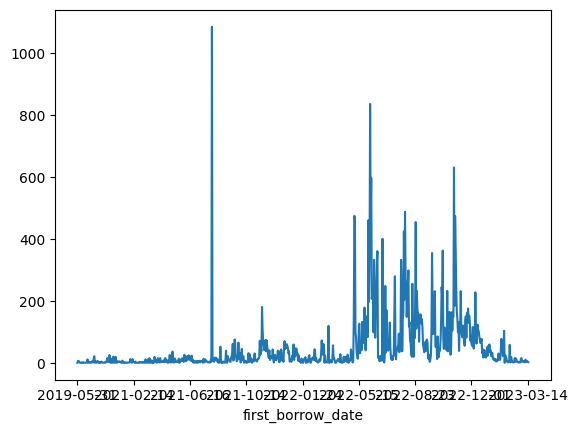

In [143]:
df.groupby('first_borrow_date').count().address.plot()

<Axes: xlabel='first_borrow_date'>

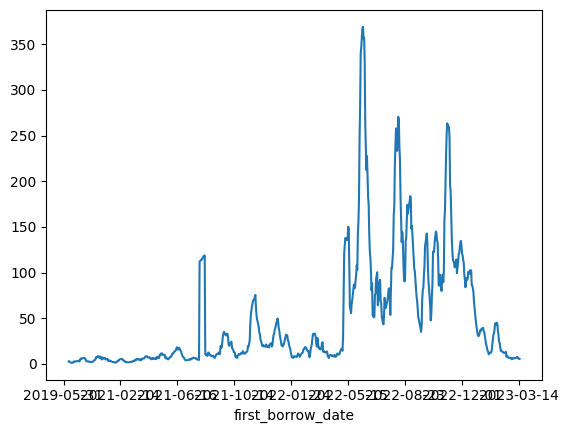

In [144]:
df.groupby('first_borrow_date').count().address.rolling(window=10).mean().plot()

In [9]:
df[['address', 'first_borrow_date']].value_counts().to_frame().reset_index().rename(columns={0: 'count'}).sort_values('count', ascending=False).address.value_counts()

address
0xd1a8dd23e356b9fae27df5def9ea025a602ec81e    4
0x91191d0ebdbf928829c2e66c7bfe23d6d241a260    3
0x325409632bccffac706d378a2eca57cafa21ab11    3
0x4929f4d38f2955649b5aa34343da04cf790b9d92    3
0x81a8f3091f0d218e04349dd595e4b7470fee323a    3
                                             ..
0x86fe805dc5ca7aa17d43f6f8394f7fcccd41ed1f    1
0x86b3275ab0e47e4906a3ab4dd6226abec6acd00d    1
0xf88d2f91a5df07a106a5386419b37471ef565b69    1
0x86d59c9ce036fece951bfa720823b8216e34aeb1    1
0x7e74b1e35ff6ca72e6ffc0a86e4afeb023011e56    1
Name: count, Length: 14905, dtype: int64

In [12]:
df[['calc_start_time', 'first_borrow_date']]

,calc_start_time,first_borrow_date
0,2023-02-04 16:06:12.097,2022-05-07
1,2023-03-01 16:06:24.346,2022-08-02
2,2023-02-03 16:06:11.043,2022-11-21
3,2023-02-05 16:06:16.899,2022-08-27
4,2023-01-18 21:18:42.947,2022-09-06
...,...,...
783317,2023-03-11 16:06:34.372,2022-02-15
783318,2023-02-17 16:06:19.246,2022-08-21
783319,2023-03-10 16:06:41.333,2023-01-24
783320,2023-02-01 16:06:09.451,2022-08-23


In [49]:
df.groupby('token_borrow_mode').liquidated.agg({'mean', 'std', 'count'}).sort_values(by = 'count', ascending=False)
# .sort_values().plot(kind='')

,count,std,mean
token_borrow_mode,,,
USDC,18956,0.381580,0.176883
DAI,13469,0.369281,0.162893
usdc,1751,0.362874,0.844089
GHST,1517,0.166012,0.028345
WMATIC,1082,0.247730,0.065619
WETH,608,0.391946,0.189145
USDT,518,0.356086,0.148649
BUSD,156,0.409715,0.211538
WAVAX,102,0.169792,0.029412


In [26]:
'usdc', 'dai', 'ghst', 'wmatic', 'weth', 'usdt', 'busd', 'wavax',
       'susd', 'wbtc', 'bnb', 'dai.e', 'cake', 'eth', 'ageur', 'link', 'jeur',
       'eurs', 'sushi', 'crv', 'usdc.e', 'usdt.e', 'frax', 'bal', 'wftm',
       'yfi', 'ltc', 'btcb', 'sxp', 'g-uni', 'bat', 'tusd', 'doge', 'comp',
       'ydai+yusdc+yusdt+ytusd', 'ust', 'cream', 'xrp', 'mimatic', 'quick',
       'yydai+yusdc+yusdt+ytusd',  'dpi', 
       
       'aave', 'amp', 'twt', 'uni', 'rai', 'uni-v2', 
       
       'weth.e', 'wbtc.e', 'dot','ada'

Index(['usdc', 'dai', 'ghst', 'wmatic', 'weth', 'usdt', 'busd', 'wavax',
       'susd', 'wbtc', 'bnb', 'dai.e', 'cake', 'eth', 'ageur', 'link', 'jeur',
       'eurs', 'sushi', 'crv', 'usdc.e', 'usdt.e', 'frax', 'bal', 'wftm',
       'yfi', 'ltc', 'btcb', 'sxp', 'g-uni', 'bat', 'tusd', 'doge', 'comp',
       'ydai+yusdc+yusdt+ytusd', 'ust', 'cream', 'xrp', 'mimatic', 'quick',
       'yydai+yusdc+yusdt+ytusd', 'aave', 'wbtc.e', 'dot', 'dpi', 'amp',
       'weth.e', 'twt', 'uni', 'rai', 'uni-v2', 'ada'],
      dtype='object', name='token_borrow_mode')

In [27]:
stables = ['usdc', 'dai', 'ghst', 'usdt', 'busd',  'susd',  'dai.e', 'jeur', 'eurs', 'usdc.e', 'usdt.e', 'frax', 'ydai+yusdc+yusdt+ytusd', 'ust',  'yydai+yusdc+yusdt+ytusd']

In [25]:
df.token_borrow_mode.str.lower().value_counts()

token_borrow_mode
usdc                       20707
dai                        13469
ghst                        1517
wmatic                      1082
weth                         608
usdt                         547
busd                         156
wavax                        102
susd                          93
wbtc                          74
bnb                           65
dai.e                         38
cake                          35
eth                           29
ageur                         16
link                          15
jeur                          14
eurs                          14
sushi                         12
crv                            9
usdc.e                         8
usdt.e                         6
frax                           5
bal                            5
wftm                           4
yfi                            4
ltc                            4
btcb                           4
sxp                            3
g-uni                    

In [40]:
import numpy as np
forbidden =['total_liquidation', 'count_liquidation', 'avg_liquidation_amount', 'std_liquidation_amount', 'liquidation_amount_cv', 'avg_liquidation_to_avg_borrow', 'liquidated']

# forbidden =['total_liquidation', 'count_liquidation', 'avg_liquidation_amount', 'std_liquidation_amount', 'liquidation_amount_cv', 'avg_liquidation_to_avg_borrow']
predictors_df = df[df.columns[~df.columns.isin(forbidden)]]

np.where(predictors_df.token_borrow_mode.str.lower().isin(stables), 'stable', predictors_df.token_borrow_mode.str.lower())

array(['stable', 'stable', 'stable', ..., 'stable', 'stable', 'stable'],
      dtype=object)

In [54]:
import numpy as np
forbidden =['total_liquidation', 'count_liquidation', 'avg_liquidation_amount', 'std_liquidation_amount', 'liquidation_amount_cv', 'avg_liquidation_to_avg_borrow', 'liquidated']

# forbidden =['total_liquidation', 'count_liquidation', 'avg_liquidation_amount', 'std_liquidation_amount', 'liquidation_amount_cv', 'avg_liquidation_to_avg_borrow']
predictors_df = df[df.columns[~df.columns.isin(forbidden)]]

# predictors_df['stables'] = np.where(predictors_df.token_borrow_mode.isin(stables), 1, 0)
# predictors_df['token_borrow_mode'] = np.where(predictors_df.token_borrow_mode.isin(stables), 'stable', predictors_df.token_borrow_mode)
commonly_borrowed_tokens_tokens = predictors_df.token_borrow_mode.value_counts(normalize=True)[predictors_df.token_borrow_mode.value_counts(normalize=True)*100>0.1].index

predictors_df['token_borrowed'] = np.where(predictors_df.token_borrow_mode.isin(commonly_borrowed_tokens_tokens), predictors_df.token_borrow_mode, 'other')

predictors_df.drop('token_borrow_mode', axis=1, inplace=True)
predictors_df.token_borrowed.value_counts(normalize=True)

/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_41472/3201231051.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictors_df['token_borrowed'] = np.where(predictors_df.token_borrow_mode.isin(commonly_borrowed_tokens_tokens), predictors_df.token_borrow_mode, 'other')
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_41472/3201231051.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictors_df.drop('token_borrow_mode', axis=1, inplace=True)


token_borrowed
USDC      0.490009
DAI       0.348171
usdc      0.045263
GHST      0.039214
WMATIC    0.027969
WETH      0.015717
USDT      0.013390
other     0.007600
BUSD      0.004033
WAVAX     0.002637
sUSD      0.002404
WBTC      0.001913
BNB       0.001680
Name: proportion, dtype: float64

In [171]:
predictors_df.days_since_first_borrow

773164    174.0
582606    122.0
527258    170.0
709361     82.0
294440     30.0
          ...  
613620    231.0
85615     116.0
666152     97.0
283939     70.0
252667    204.0
Name: days_since_first_borrow, Length: 38688, dtype: float64

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006538 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8030
[LightGBM] [Info] Number of data points in the train set: 30948, number of used features: 46
[LightGBM] [Info] Start training from score 0.075665
Training RMSE: 0.011534982561097206
Test RMSE: 0.07142232561452048


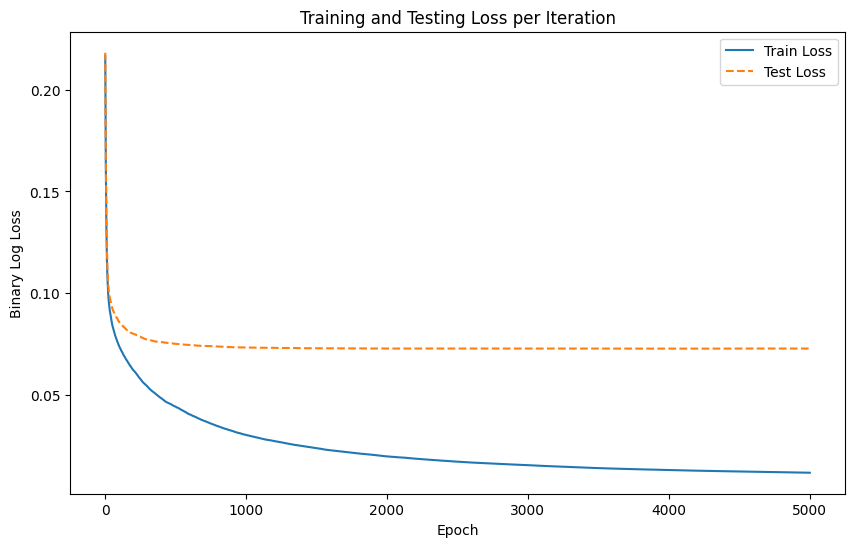

In [55]:
import pandas as pd
predictors_df = predictors_df[['total_borrow', 'count_borrow', 'avg_borrow_amount',
       'std_borrow_amount', 'borrow_amount_cv',
       'total_repay', 'count_repay', 'avg_repay_amount', 'std_repay_amount',
       'repay_amount_cv', 'total_deposit', 'count_deposit',
       'avg_deposit_amount', 'std_deposit_amount', 'deposit_amount_cv',
       'total_redeem', 'count_redeem', 'avg_redeem_amount',
       'std_redeem_amount', 'redeem_amount_cv', 'days_since_first_borrow',
       'net_outstanding', 'int_paid', 'net_deposits',
       'count_repays_to_count_borrows', 'avg_repay_to_avg_borrow',
       'net_outstanding_to_total_borrowed', 'net_outstanding_to_total_repaid',
       'count_redeems_to_count_deposits', 'total_redeemed_to_total_deposits',
       'avg_redeem_to_avg_deposit', 'net_deposits_to_total_deposits',
       'net_deposits_to_total_redeemed', 'dex_total_sum_added',
       'dex_total_sum_removed', 'dex_total_sum_swapped', 'token_borrowed', 'total_liquidation_to_total_borrow']]
# Convert 'token_borrowed' column to dummies
try:
    token_borrowed_dummies = pd.get_dummies(predictors_df['token_borrowed'], prefix='token')
    predictors_df = pd.concat([predictors_df, token_borrowed_dummies], axis=1)
    predictors_df.drop('token_borrowed', axis=1, inplace=True)
except:
    pass
from sklearn.model_selection import train_test_split

# Separate features and target
X = predictors_df.drop('total_liquidation_to_total_borrow', axis=1)
y = predictors_df['total_liquidation_to_total_borrow']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import lightgbm as lgb

# Prepare the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters for the LightGBM model
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    
}

# Train the model
evals_result = {}

# Train the model with evaluation results
num_round = 5000
bst = lgb.train(params, train_data, num_round, valid_sets=[train_data, test_data], 
                valid_names=['train', 'test'], callbacks=[
                        #lgb.early_stopping(stopping_rounds=300), 
                        lgb.record_evaluation(evals_result)] )

from sklearn.metrics import log_loss

# Predict probabilities for the training and testing data
y_train_pred = bst.predict(X_train)
y_test_pred = bst.predict(X_test)
y_test_pred = np.maximum(0, y_test_pred)
from sklearn.metrics import mean_squared_error

# Calculate the log loss for training and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f'Training RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# Extract the log losses for both training and test sets
train_losses = evals_result['train']['rmse']
test_losses = evals_result['test']['rmse']

# Generate the epochs range
epochs = range(1, len(train_losses) + 1)

# Plotting the training and testing loss curves
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss', linestyle='--')
plt.title('Training and Testing Loss per Iteration')
plt.xlabel('Epoch')
plt.ylabel('Binary Log Loss')
plt.legend()
plt.show()

In [6]:
import pandas as pd
import autogluon.tabular as ag

# Assuming your 'predictors_df' data frame and other preprocessing steps are the same

# Convert 'token_borrowed' column to dummies
try:
    token_borrowed_dummies = pd.get_dummies(predictors_df['token_borrowed'], prefix='token')
    predictors_df = pd.concat([predictors_df, token_borrowed_dummies], axis=1)
    predictors_df.drop('token_borrowed', axis=1, inplace=True)
except Exception as e:
    print(e)

from sklearn.model_selection import train_test_split

# Separate features and target
X = predictors_df.drop('total_liquidation_to_total_borrow', axis=1)
y = predictors_df['total_liquidation_to_total_borrow']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare the training and testing data
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Train a model using AutoGluon
predictor = ag.TabularPredictor(label='total_liquidation_to_total_borrow').fit(train_data, time_limits=7200)


# Evaluate the model
performance = predictor.evaluate(test_data)

# Print RMSE
print("Test RMSE:", performance['root_mean_squared_error'])


/usr/local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No path specified. Models will be saved in: "AutogluonModels/ag-20240509_173739"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.


'token_borrowed'


Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240509_173739"
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.11.8
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 20.6.0: Thu Jul  6 22:12:47 PDT 2023; root:xnu-7195.141.49.702.12~1/RELEASE_X86_64
CPU Count:          8
Memory Avail:       6.58 GB / 16.00 GB (41.1%)
Disk Space Avail:   335.17 GB / 465.47 GB (72.0%)
Train Data Rows:    30950
Train Data Columns: 43
Label Column:       total_liquidation_to_total_borrow
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (5.469604580289396, 0.0, 0.07601, 0.23537)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 

[1000]	valid_set's rmse: 0.147908
[2000]	valid_set's rmse: 0.145696
[3000]	valid_set's rmse: 0.144749
[4000]	valid_set's rmse: 0.143883
[5000]	valid_set's rmse: 0.143368
[6000]	valid_set's rmse: 0.143215
[7000]	valid_set's rmse: 0.142802
[8000]	valid_set's rmse: 0.142646
[9000]	valid_set's rmse: 0.142618
[10000]	valid_set's rmse: 0.142489


	-0.1424	 = Validation score   (-root_mean_squared_error)
	38.66s	 = Training   runtime
	1.22s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 0.145994
[2000]	valid_set's rmse: 0.143467
[3000]	valid_set's rmse: 0.142988
[4000]	valid_set's rmse: 0.142645
[5000]	valid_set's rmse: 0.142429
[6000]	valid_set's rmse: 0.14236


	-0.1423	 = Validation score   (-root_mean_squared_error)
	25.66s	 = Training   runtime
	0.38s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.1462	 = Validation score   (-root_mean_squared_error)
	65.42s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: CatBoost ...
		
Fitting model: ExtraTreesMSE ...
	-0.1462	 = Validation score   (-root_mean_squared_error)
	6.18s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-0.1807	 = Validation score   (-root_mean_squared_error)
	34.89s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: XGBoost ...
	-0.1432	 = Validation score   (-root_mean_squared_error)
	8.8s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-0.2666	 = Validation score   (-root_mean_squared_error)
	21.35s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: LightGBMLarge ...


[1000]	valid_set's rmse: 0.142436
[2000]	valid_set's rmse: 0.142279
[3000]	valid_set's rmse: 0.142183
[4000]	valid_set's rmse: 0.142167


	-0.1422	 = Validation score   (-root_mean_squared_error)
	25.17s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'LightGBMXT': 0.312, 'LightGBMLarge': 0.312, 'XGBoost': 0.188, 'LightGBM': 0.125, 'NeuralNetFastAI': 0.062}
	-0.1401	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 254.16s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240509_173739")


Test RMSE: -0.08656131612946773


In [14]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data
X = predictors_df.drop('total_liquidation_to_total_borrow', axis=1)
y = predictors_df['total_liquidation_to_total_borrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for optimization
def objective(trial):
    # Suggest hyperparameters
    param = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
    
    # Create datasets for LightGBM
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
    
    # Model training
    model = lgb.train(param, train_data, valid_sets=[val_data], num_boost_round=5000)
    
    # Predictions and evaluation
    preds = model.predict(X_test)
    preds = np.maximum(0, preds)  # ensure predictions are non-negative
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    
    return rmse

# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

# You can retrieve the best model parameters like this
best_params = study.best_trial.params
print(best_params)


[I 2024-05-09 19:05:00,239] A new study created in memory with name: no-name-00a79913-5c90-4e94-887f-771c139c21ac


/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_39159/1836146079.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_39159/1836146079.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_39159/1836146079.py:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8013
[LightGBM] [Info] Number of data points in the train set: 30950, number of used features: 40
[LightGBM] [Info] Start training from score 0.076011


[I 2024-05-09 19:05:32,306] Trial 0 finished with value: 0.09019792689055539 and parameters: {'lambda_l1': 0.16718840219534553, 'lambda_l2': 2.9434274716058004, 'num_leaves': 53, 'feature_fraction': 0.6670106105508062, 'bagging_fraction': 0.5610715793417395, 'bagging_freq': 2, 'min_child_samples': 60}. Best is trial 0 with value: 0.09019792689055539.
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_39159/1836146079.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_39159/1836146079.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'la

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8013
[LightGBM] [Info] Number of data points in the train set: 30950, number of used features: 40
[LightGBM] [Info] Start training from score 0.076011


[I 2024-05-09 19:06:21,620] Trial 1 finished with value: 0.0883775775709197 and parameters: {'lambda_l1': 1.7937960918105337e-08, 'lambda_l2': 0.01963385640899278, 'num_leaves': 104, 'feature_fraction': 0.8676416475857183, 'bagging_fraction': 0.8127050662295001, 'bagging_freq': 4, 'min_child_samples': 62}. Best is trial 1 with value: 0.0883775775709197.
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_39159/1836146079.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_39159/1836146079.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8013
[LightGBM] [Info] Number of data points in the train set: 30950, number of used features: 40
[LightGBM] [Info] Start training from score 0.076011


[I 2024-05-09 19:07:47,518] Trial 2 finished with value: 0.08679828979821597 and parameters: {'lambda_l1': 1.8630678647298528e-07, 'lambda_l2': 3.338040022412631e-05, 'num_leaves': 250, 'feature_fraction': 0.6755090305706455, 'bagging_fraction': 0.9103270387312223, 'bagging_freq': 3, 'min_child_samples': 20}. Best is trial 2 with value: 0.08679828979821597.
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_39159/1836146079.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_39159/1836146079.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8013
[LightGBM] [Info] Number of data points in the train set: 30950, number of used features: 40
[LightGBM] [Info] Start training from score 0.076011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-05-09 19:09:29,507] Trial 3 finished with value: 0.08995273286608406 and parameters: {'lambda_l1': 0.00010431323336381845, 'lambda_l2': 3.14945734652641e-07, 'num_leaves': 206, 'feature_fraction': 0.7179566540703477, 'bagging_fraction': 0.6713293701371492, 'bagging_freq': 5, 'min_child_samples': 90}. Best is trial 2 with value: 0.08679828979821597.
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_39159/1836146079.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_39159/1836146079.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8013
[LightGBM] [Info] Number of data points in the train set: 30950, number of used features: 40
[LightGBM] [Info] Start training from score 0.076011


[I 2024-05-09 19:10:45,146] Trial 4 finished with value: 0.08873470633418655 and parameters: {'lambda_l1': 2.0201862286847094e-07, 'lambda_l2': 2.6119517970205448e-08, 'num_leaves': 194, 'feature_fraction': 0.4811642181562308, 'bagging_fraction': 0.8061114242756631, 'bagging_freq': 3, 'min_child_samples': 54}. Best is trial 2 with value: 0.08679828979821597.
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_39159/1836146079.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_39159/1836146079.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instea

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8013
[LightGBM] [Info] Number of data points in the train set: 30950, number of used features: 40
[LightGBM] [Info] Start training from score 0.076011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-05-09 19:11:46,347] Trial 5 finished with value: 0.08696622973620334 and parameters: {'lambda_l1': 0.14799701778980204, 'lambda_l2': 0.18878469659757616, 'num_leaves': 90, 'feature_fraction': 0.44839034349497686, 'bagging_fraction': 0.9502216992942094, 'bagging_freq': 6, 'min_child_samples': 16}. Best is trial 2 with value: 0.08679828979821597.
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_39159/1836146079.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_39159/1836146079.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  '

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8013
[LightGBM] [Info] Number of data points in the train set: 30950, number of used features: 40
[LightGBM] [Info] Start training from score 0.076011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-05-09 19:15:34,968] Trial 6 finished with value: 0.09003800274239922 and parameters: {'lambda_l1': 2.085896456154456e-05, 'lambda_l2': 1.177927857948003e-07, 'num_leaves': 216, 'feature_fraction': 0.9172169959311508, 'bagging_fraction': 0.7937242137959296, 'bagging_freq': 2, 'min_child_samples': 87}. Best is trial 2 with value: 0.08679828979821597.
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_39159/1836146079.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_39159/1836146079.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8013
[LightGBM] [Info] Number of data points in the train set: 30950, number of used features: 40
[LightGBM] [Info] Start training from score 0.076011


[I 2024-05-09 19:16:32,832] Trial 7 finished with value: 0.08890949686241573 and parameters: {'lambda_l1': 1.5971044886568115e-07, 'lambda_l2': 0.00015862716043936042, 'num_leaves': 123, 'feature_fraction': 0.4115210837143674, 'bagging_fraction': 0.5147458710748312, 'bagging_freq': 6, 'min_child_samples': 28}. Best is trial 2 with value: 0.08679828979821597.
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_39159/1836146079.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_39159/1836146079.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instea

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8013
[LightGBM] [Info] Number of data points in the train set: 30950, number of used features: 40
[LightGBM] [Info] Start training from score 0.076011


[I 2024-05-09 19:16:55,743] Trial 8 finished with value: 0.08825080963084653 and parameters: {'lambda_l1': 1.7472970104535139e-06, 'lambda_l2': 0.5386579612900187, 'num_leaves': 24, 'feature_fraction': 0.5342553861039246, 'bagging_fraction': 0.8795502941633963, 'bagging_freq': 6, 'min_child_samples': 24}. Best is trial 2 with value: 0.08679828979821597.
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_39159/1836146079.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
/var/folders/3d/3_dbb7097rzc81cpv1mrh_nr0000gn/T/ipykernel_39159/1836146079.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008705 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8013
[LightGBM] [Info] Number of data points in the train set: 30950, number of used features: 40
[LightGBM] [Info] Start training from score 0.076011
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-05-09 19:18:21,534] Trial 9 finished with value: 0.0897930260141183 and parameters: {'lambda_l1': 0.28865093121690816, 'lambda_l2': 8.961954433389452e-07, 'num_leaves': 125, 'feature_fraction': 0.5854039204549759, 'bagging_fraction': 0.4765263711311278, 'bagging_freq': 1, 'min_child_samples': 31}. Best is trial 2 with value: 0.08679828979821597.


Number of finished trials: 10
Best trial: {'lambda_l1': 1.8630678647298528e-07, 'lambda_l2': 3.338040022412631e-05, 'num_leaves': 250, 'feature_fraction': 0.6755090305706455, 'bagging_fraction': 0.9103270387312223, 'bagging_freq': 3, 'min_child_samples': 20}
{'lambda_l1': 1.8630678647298528e-07, 'lambda_l2': 3.338040022412631e-05, 'num_leaves': 250, 'feature_fraction': 0.6755090305706455, 'bagging_fraction': 0.9103270387312223, 'bagging_freq': 3, 'min_child_samples': 20}


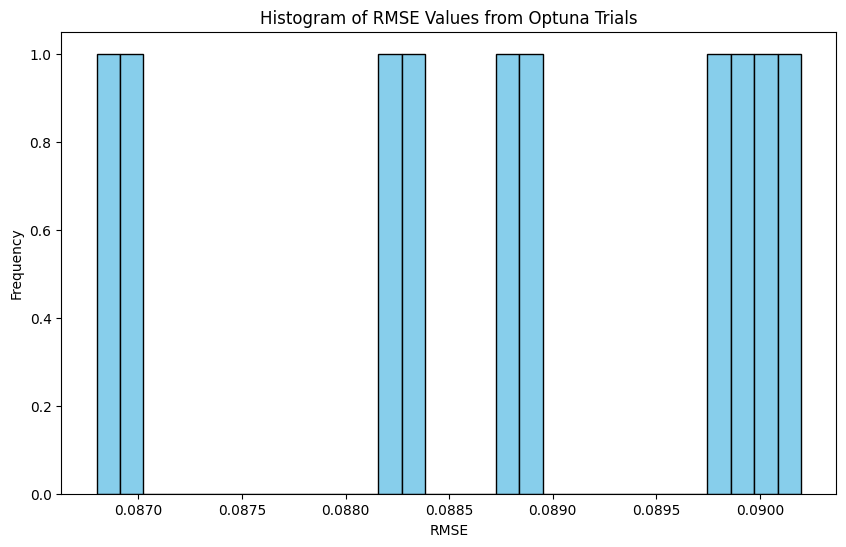

In [15]:
import matplotlib.pyplot as plt

# Extract RMSE values from each trial
rmse_values = [trial.value for trial in study.trials if trial.value is not None]

# Plotting the histogram of RMSE values
plt.figure(figsize=(10, 6))
plt.hist(rmse_values, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of RMSE Values from Optuna Trials')
plt.xlabel('RMSE')
plt.ylabel('Frequency')
plt.show()


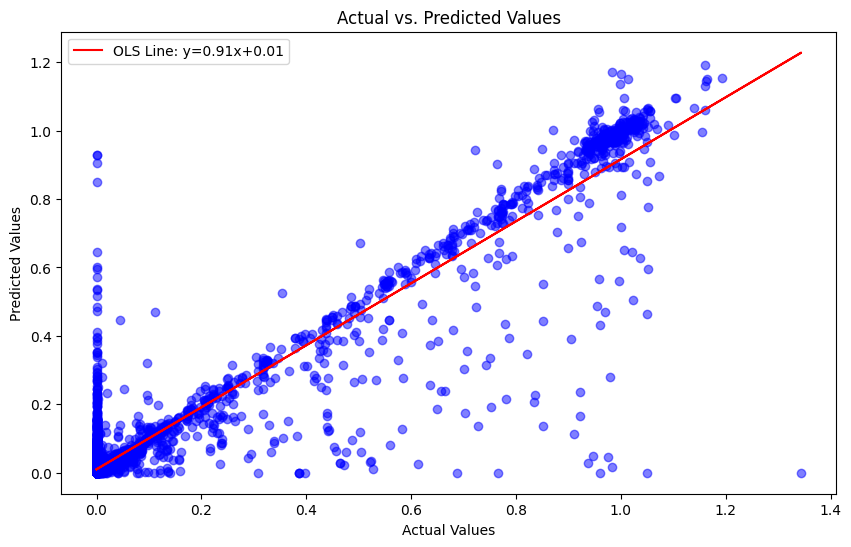

In [56]:
# y_test_pred = bst.predict(X_test)
# y_test_pred = bst.predict(X_test)
X_test_eval = X_test.copy()
X_test_eval['y'] = y_test
y_test_pred = np.maximum(0, y_test_pred)
X_test_eval['y_pred'] = y_test_pred


import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test_eval['y'], X_test_eval['y_pred'], alpha=0.5, color='blue')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Fit and plot OLS regression line
m, b = np.polyfit(X_test_eval['y'], X_test_eval['y_pred'], 1)
plt.plot(X_test_eval['y'], m*X_test_eval['y'] + b, color='red', label=f'OLS Line: y={m:.2f}x+{b:.2f}')

plt.legend()
plt.show()

In [10]:
X_test_eval

,total_borrow,count_borrow,avg_borrow_amount,std_borrow_amount,borrow_amount_cv,total_repay,count_repay,avg_repay_amount,std_repay_amount,repay_amount_cv,...,dex_total_sum_swapped,token_dai,token_ghst,token_other,token_usdc,token_usdt,token_weth,token_wmatic,y,y_pred
32057,5.746625,33,0.174140,0.890945,5.116252,5.112837,2.0,2.556419,3.615180,1.414158,...,0.0,True,False,False,False,False,False,False,0.000000,0.006442
8047,1.813375,3,0.604458,0.341771,0.565417,1.813375,3.0,0.604458,0.341771,0.565417,...,0.0,False,False,False,True,False,False,False,0.000000,0.004440
16711,107.930804,18,5.996156,24.732862,4.124786,108.285029,18.0,6.015835,24.816349,4.125171,...,0.0,False,False,False,True,False,False,False,0.000000,0.000000
22885,50.993791,27,1.888659,2.877422,1.523526,9.194822,5.0,1.838964,2.361097,1.283928,...,0.0,False,False,False,True,False,False,False,0.437204,0.365883
1670,2968.903820,57,52.086032,85.829415,1.647839,2341.927992,51.0,45.920157,66.944835,1.457853,...,0.0,False,False,False,True,False,False,False,0.000000,0.009512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34098,57.350152,12,4.779179,11.230288,2.349836,52.997582,5.0,10.599516,16.584801,1.564675,...,0.0,False,False,False,True,False,False,False,0.000000,0.014944
31649,1.053794,3,0.351265,0.230554,0.656355,0.908926,2.0,0.454463,0.077350,0.170201,...,0.0,False,True,False,False,False,False,False,0.000000,0.007823
2278,106.325282,8,13.290660,37.022218,2.785582,106.537988,3.0,35.512663,60.290758,1.697726,...,0.0,False,False,False,True,False,False,False,0.000000,0.000000
8274,230.933731,32,7.216679,29.799897,4.129309,231.916500,7.0,33.130929,60.307064,1.820265,...,0.0,False,False,False,True,False,False,False,0.000000,0.034996


In [9]:
X_test_eval[(X_test_eval['y'] ==0)&(X_test_eval['y_pred'] >0)]

,total_borrow,count_borrow,avg_borrow_amount,std_borrow_amount,borrow_amount_cv,total_repay,count_repay,avg_repay_amount,std_repay_amount,repay_amount_cv,...,dex_total_sum_swapped,token_dai,token_ghst,token_other,token_usdc,token_usdt,token_weth,token_wmatic,y,y_pred
32057,5.746625,33,0.174140,0.890945,5.116252,5.112837,2.0,2.556419,3.615180,1.414158,...,0.0,True,False,False,False,False,False,False,0.0,0.006442
8047,1.813375,3,0.604458,0.341771,0.565417,1.813375,3.0,0.604458,0.341771,0.565417,...,0.0,False,False,False,True,False,False,False,0.0,0.004440
1670,2968.903820,57,52.086032,85.829415,1.647839,2341.927992,51.0,45.920157,66.944835,1.457853,...,0.0,False,False,False,True,False,False,False,0.0,0.009512
5394,0.044024,1,0.044024,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,False,True,False,False,False,False,False,0.0,0.027965
19247,1.998412,1,1.998412,0.000000,0.000000,2.002027,1.0,2.002027,0.000000,0.000000,...,0.0,False,False,False,True,False,False,False,0.0,0.021283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37785,0.118824,16,0.007427,0.004433,0.596849,0.009993,1.0,0.009993,0.000000,0.000000,...,0.0,False,False,False,True,False,False,False,0.0,0.009968
34098,57.350152,12,4.779179,11.230288,2.349836,52.997582,5.0,10.599516,16.584801,1.564675,...,0.0,False,False,False,True,False,False,False,0.0,0.014944
31649,1.053794,3,0.351265,0.230554,0.656355,0.908926,2.0,0.454463,0.077350,0.170201,...,0.0,False,True,False,False,False,False,False,0.0,0.007823
8274,230.933731,32,7.216679,29.799897,4.129309,231.916500,7.0,33.130929,60.307064,1.820265,...,0.0,False,False,False,True,False,False,False,0.0,0.034996


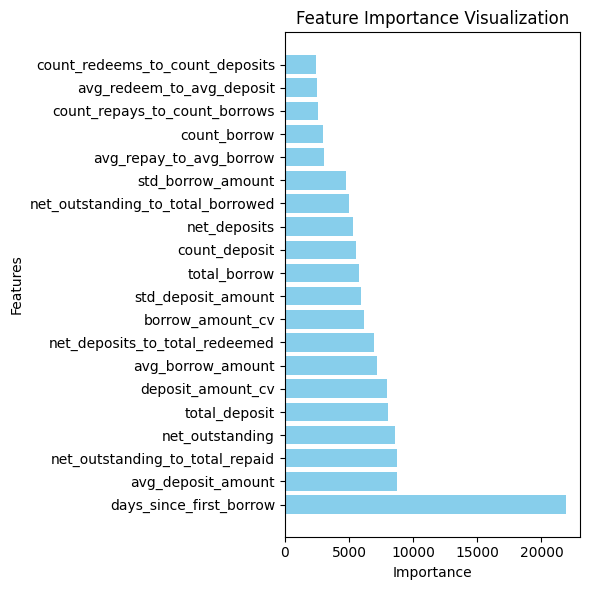

In [178]:
importance = bst.feature_importance()

# Get feature names
feature_names = bst.feature_name()

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature Name': feature_names,
    'Importance': importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
feature_importance_df =feature_importance_df[:20]
# Creating the plot
plt.figure(figsize=(6, 6))
plt.barh(feature_importance_df['Feature Name'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance Visualization')
plt.tight_layout()

# Show the plot
plt.show()